In [1]:
# pip install tensorflow

# **Image Classification With TensorFlow**

Project ini melatih model Neural Networks untuk mengklasifikasikan gambar pakaian, seperti sepatu sneakers dan baju.

## **Data Info**

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Project ini menggunakan dataset Fashion MNIST yang berisi 70.000 gambar berwarna abu-abu dalam 10 kategori. Gambar-gambar tersebut menampilkan pakaian individual dengan resolusi rendah (28 x 28 piksel)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Di sini, 60.000 gambar digunakan untuk data train jaringan dan 10.000 gambar data test digunakan untuk mengevaluasi seberapa baik jaringan telah belajar mengklasifikasikan gambar. Anda dapat mengakses Fashion MNIST langsung dari TensorFlow. Impor dan muat data Fashion MNIST langsung dari TensorFlow

<img src="https://www.tensorflow.org/images/fashion-mnist-sprite.png" alt="Deskripsi Gambar">

### **Labelling Data**

 Setiap gambar dipetakan ke satu label tunggal. Karena nama-nama kelas tidak disertakan dalam dataset, buat label nya untuk digunakan nanti saat memplot gambar-gambar:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

| Label | Class        |
|-------|--------------|
| 0     | T-shirt/top  |
| 1     | Trouser      |
| 2     | Pullover     |
| 3     | Dress        |
| 4     | Coat         |
| 5     | Sandal       |
| 6     | Shirt        |
| 7     | Sneaker      |
| 8     | Boot         |
| 9     | Ankle Boot   |


# **Data Explore**

Mari kita eksplorasi format dari dataset sebelum melatih model. Berikut adalah informasi bahwa terdapat 60.000 gambar dalam data train, di mana setiap gambar direpresentasikan sebagai 28 x 28 piksel:

In [5]:
train_images.shape

(60000, 28, 28)

Ada 10.000 gambar dalam data test. Sekali lagi, setiap gambar direpresentasikan sebagai 28 x 28 piksel:

In [6]:
test_images.shape

(10000, 28, 28)

# **Preprocess Data**

Data harus diproses sebelum melatih Neural Network. Jika Anda memeriksa gambar pertama dalam set pelatihan, Anda akan melihat bahwa nilai-nilai piksel berada dalam rentang 0 hingga 255:

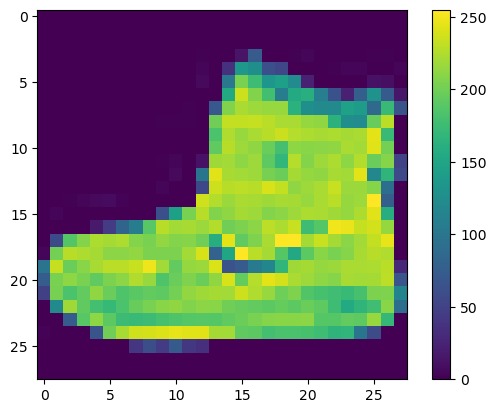

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Skalakan nilai-nilai ini ke dalam rentang pixel yang sama sebelum memberikannya ke model NeuralNetworks. Untuk melakukannya, bagi nilai-nilai tersebut dengan 255. Penting bahwa set pelatihan dan set pengujian diproses dengan cara yang sama:

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Untuk memverifikasi bahwa data berada dalam format yang benar dan Anda siap untuk membangun dan melatih NeuralNetworks, mari tampilkan 25 gambar pertama dari set pelatihan dan tampilkan nama kelas di bawah setiap gambar.

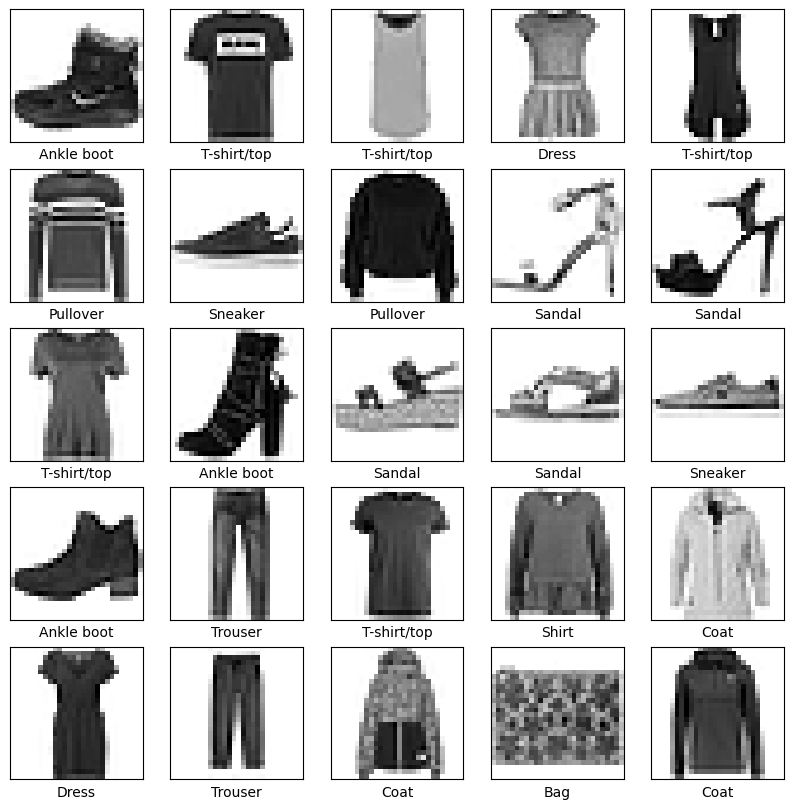

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Build The Model**

## **Set Up The Layers**

Blok dasar dari NeuralNetworks adalah lapisan (layer). Lapisan-lapisan ini mengekstrak representasi dari data yang dimasukkan ke dalamnya. Diharapkan representasi-representasi ini memiliki makna untuk masalah yang sedang dihadapi.

Sebagian besar dari deep learning melibatkan penggabungan bersama lapisan-lapisan sederhana. Sebagian besar lapisan, seperti tf.keras.layers.Dense, memiliki parameter-parameter yang dipelajari selama pelatihan.

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Lapisan pertama dalam jaringan ini, `tf.keras.layers.Flatten`, mengubah format gambar dari layer dua dimensi (28 x 28 piksel) menjadi layer satu dimensi (28 * 28 = 784 piksel). Anda dapat membayangkan lapisan ini sebagai menggulung baris piksel dalam gambar dan menyusunnya menjadi satu baris. Lapisan ini tidak memiliki parameter yang dipelajari; itu hanya mengubah format data.

Setelah piksel digulung, jaringan terdiri dari dua lapisan `tf.keras.layers.Dense` berturut-turut. Ini adalah lapisan saraf yang terhubung secara penuh. Lapisan Dense pertama memiliki 128 node (atau neuron). Lapisan kedua (dan terakhir) mengembalikan layer logit dengan panjang 10. Setiap node berisi skor yang menunjukkan bahwa gambar saat ini termasuk ke salah satu dari 10 kelas.

## **Compile The Model**

Sebelum model siap untuk dilatih, beberapa pengaturan tambahan diperlukan. Ini ditambahkan selama langkah kompilasi model:

1. Optimizer — Ini adalah cara model diperbarui berdasarkan data yang dilihatnya dan fungsi kerugian (loss function) yang dimilikinya.

2. Fungsi Kerugian (Loss function) — Ini mengukur seberapa akurat model selama pelatihan. Anda ingin meminimalkan fungsi ini untuk "mengarahkan" model ke arah yang benar.

3. Metrik (Metrics) — Digunakan untuk memantau langkah-langkah pelatihan dan pengujian. Contoh berikut menggunakan akurasi, yaitu fraksi gambar yang diklasifikasikan dengan benar.

Ini adalah langkah penting dalam mempersiapkan model sebelum melatihnya.

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Train The Model**

Saat model dilatih, metrik kerugian (loss) dan akurasi ditampilkan. Model ini mencapai akurasi sekitar 0.91 (atau 91%) pada data train.

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4999 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3770 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3398 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3141 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2806 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2693 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2484 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.241

## **Evaluate Accuracy**

Selanjutnya, mari bandingkan bagaimana model berkinerja pada datatest:

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3553 - accuracy: 0.8821 - 653ms/epoch - 2ms/step

Test accuracy: 0.882099986076355


Ternyata, akurasi pada dataset uji sedikit lebih rendah dibandingkan dengan akurasi pada dataset pelatihan. Kesenjangan antara akurasi pelatihan dan akurasi uji ini mewakili overfitting. Overfitting terjadi ketika model machine learning berkinerja lebih buruk pada input baru yang belum pernah dilihat sebelumnya daripada pada data pelatihan. Model yang mengalami overfitting "menghafal" noise dan detail pada data pelatihan hingga suatu titik di mana itu berdampak negatif pada kinerja model pada data baru

# **Make Prediction**

Dengan model yang sudah dilatih, Anda dapat menggunakannya untuk membuat prediksi tentang beberapa gambar. Lampirkan lapisan softmax untuk mengonversi keluaran linier model, yang disebut logit, menjadi probabilitas, yang seharusnya lebih mudah diinterpretasikan.

In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step



Di sini, model telah memprediksi label untuk setiap gambar dalam set pengujian. Mari kita lihat prediksi pertama:

In [16]:
predictions[0]

array([2.7215096e-05, 3.2425219e-06, 1.4199558e-08, 3.4205141e-09,
       2.0956819e-05, 2.4539320e-04, 5.0062640e-06, 5.9132434e-02,
       3.5042203e-06, 9.4056231e-01], dtype=float32)

Sebuah prediksi adalah array berisi 10 angka. Mereka menggambarkan "confidence" model bahwa gambar tersebut sesuai dengan masing-masing dari 10 jenis pakaian yang berbeda. Anda dapat melihat label mana yang memiliki nilai confidence tertinggi:

In [17]:
np.argmax(predictions[0])

9

Jadi, model paling yakin bahwa gambar ini adalah ankle boots, atau class_names[9]. Memeriksa label pengujian menunjukkan bahwa klasifikasi ini benar:

In [18]:
test_labels[0]

9

Pada tahap ini kita akan prediksi untuk menampilkan seluruh set prediksi 10 kelas.

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

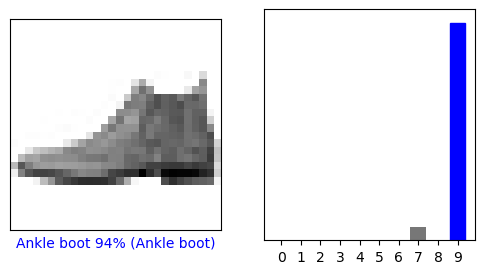

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Mari plot beberapa gambar beserta prediksinya. Perlu diingat bahwa model dapat salah meskipun sangat confidence.

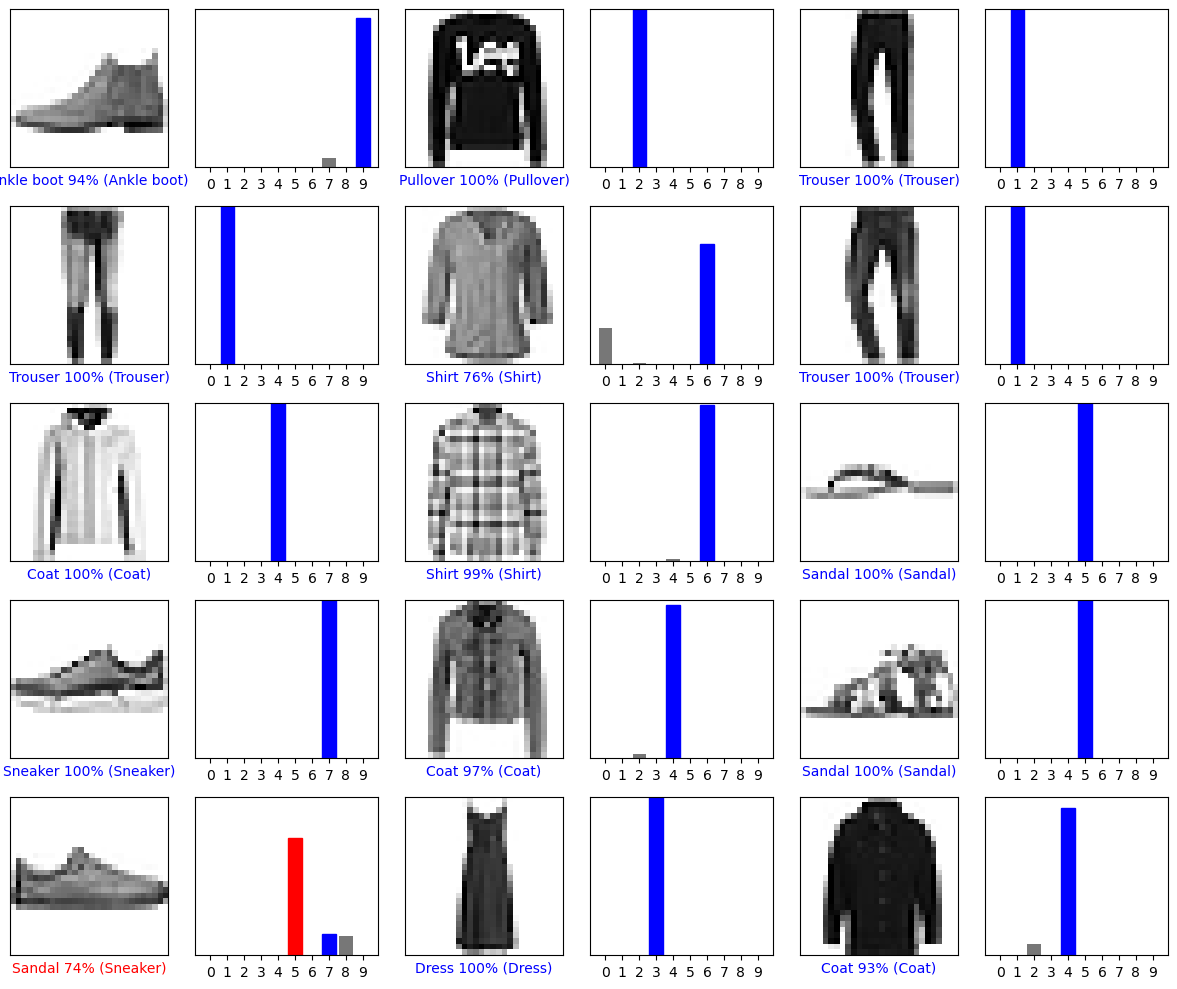

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Pada hasil ini, kita dapat melihat bahwa meskipun tingkat keyakinan (confidence) tinggi, model masih bisa mengalami kesalahan, seperti yang terjadi pada kasus sneakers yang diprediksi sebagai Sandal dengan tingkat kepercayaan sebesar 74%

# **Conclusion**

Dalam notebook ini, kita telah menjelajahi proses pengembangan model klasifikasi gambar dengan menggunakan TensorFlow dan Keras. Kami mulai dengan memahami dasar-dasar jaringan saraf tiruan dan kemudian melangkah ke pengumpulan dan persiapan data pelatihan.

Salah satu hal yang kami pelajari adalah bahwa bahkan dengan tingkat kepercayaan yang tinggi, model kami masih memiliki potensi untuk melakukan kesalahan. Misalnya, kasus ketika sepatu olahraga diprediksi sebagai sepatu mengingatkan kita bahwa meskipun alat pembelajaran mesin adalah alat yang sangat berguna, mereka tidak selalu sempurna.

Namun, kesimpulan utama yang dapat kita tarik adalah kekuatan dari kombinasi TensorFlow dan Keras dalam membangun model klasifikasi gambar yang efektif. Kami memiliki alat yang sangat kuat untuk menganalisis dan memahami gambar, dan ini dapat diterapkan dalam berbagai aplikasi, mulai dari pengenalan objek hingga identifikasi pola kompleks.

Artikel ini merupakan langkah awal yang menarik dalam dunia pembelajaran mesin dan pengolahan gambar, dan pengetahuan yang didapat di sini dapat menjadi dasar yang kuat untuk eksplorasi lebih lanjut di masa depan. Dengan pengalaman lebih lanjut dan pemahaman yang lebih mendalam, kita dapat mengembangkan model yang semakin akurat dan dapat diandalkan dalam klasifikasi gambar.